In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

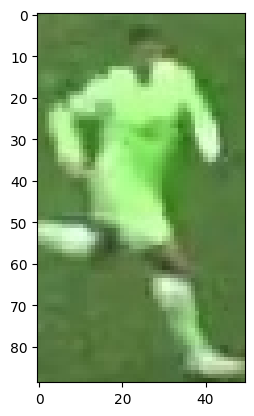

In [4]:
plt.imshow(image)
plt.show()

# cut image

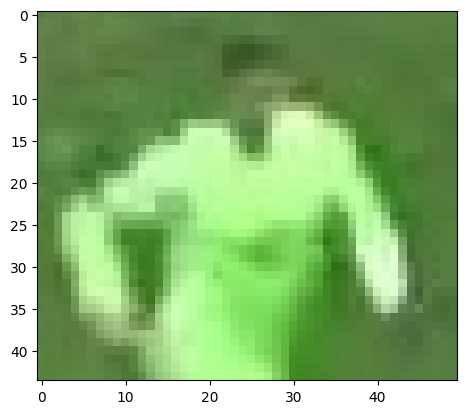

In [5]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# separate colors

C:\Users\marci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


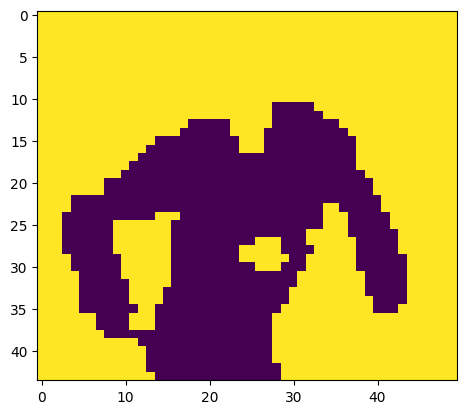

In [10]:
image_2d = top_half_image.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = kmeans.labels_
clustered_labels = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_labels)
plt.show()

In [11]:
corner_clusters = [clustered_labels[0, 0], clustered_labels[0, -1], clustered_labels[-1, 0], clustered_labels[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [12]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [13]:
kmeans.cluster_centers_[player_cluster]


array([170.81879195, 235.24966443, 142.60134228])